In [2]:
from pyspark.sql import SparkSession

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
import seaborn as sns
from scipy import stats
import pymprog as pm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
import csv
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
tickers = ['AAPL','MSFT','AMZN', 'TSLA','TGT','FB','V','WMT','PG','XOM','NSANY','ORCL','COST','CRM','NKE','JNJ','TMO','JPM',
          'UNH','CI','INTC','CSCO','T','KO','DIS','UPS','NFLX','GM','HLT','PFE']
multpl_stocks = web.get_data_yahoo(tickers,start = "2015-01-01", end = "2020-12-31")

In [7]:
tickerslowrisk=['MSFT', 'V', 'XOM', 'ORCL', 'NKE', 'TMO', 'JPM', 'UNH', 'CSCO', 'DIS', 'UPS']

In [8]:
multpl_stocks_lowrisk = web.get_data_yahoo(tickerslowrisk,start = "2015-01-01", end = "2020-12-31")

In [9]:
multpl_stocks_lowrisk

Attributes   Adj Close                                                \
Symbols           MSFT           V        XOM       ORCL         NKE   
Date                                                                   
2015-01-02   41.443684   63.507534  69.679512  39.966461   44.347309   
2015-01-05   41.062580   62.105679  67.772957  39.405972   43.633312   
2015-01-06   40.459892   61.705475  67.412659  38.999161   43.376633   
2015-01-07   40.973934   62.532223  68.095718  39.008213   44.272652   
2015-01-08   42.179317   63.370945  69.229149  39.243237   45.294640   
...                ...         ...        ...        ...         ...   
2020-12-24  222.238144  208.376495  40.905334  64.433586  141.312714   
2020-12-28  224.443069  212.300415  41.042999  64.344322  142.141006   
2020-12-29  223.634918  214.037704  40.580849  63.937641  141.282776   
2020-12-30  221.170593  218.021530  40.905334  63.878132  141.292740   
2020-12-31  221.908905  218.390945  40.531681  64.165779  141.182968   

Attributes                                                             ...  \
Symbols            TMO         JPM         UNH       CSCO         DIS  ...   
Date                                                                   ...   
2015-01-02  125.486465   52.506710   91.329041  22.617912   87.376266  ...   
2015-01-05  123.762657   50.876637   89.824738  22.167355   86.099403  ...   
2015-01-06  122.606903   49.557465   89.643463  22.159161   85.642708  ...   
2015-01-07  126.279808   49.633072   90.558754  22.363962   86.518814  ...   
2015-01-08  127.592308   50.742188   94.881439  22.535988   87.413536  ...   
...                ...         ...         ...        ...         ...  ...   
2020-12-24  457.825623  122.905769  339.583588  43.867199  173.729996  ...   
2020-12-28  460.464111  123.715141  344.725311  44.241459  178.860001  ...   
2020-12-29  462.592834  123.389427  346.120361  43.965687  177.300003  ...   
2020-12-30  461.463531  123.734886  343.768677  43.808105  181.169998  ...   
2020-12-31  465.511169  125.422722  349.438538  44.074028  181.179993  ...   

Attributes      Volume                                                \
Symbols              V         XOM        ORCL        NKE        TMO   
Date                                                                   
2015-01-02   8389600.0  10220400.0  15070200.0  4985800.0  2034700.0   
2015-01-05  12751200.0  18502400.0  18369400.0  6889200.0  2430300.0   
2015-01-06  11070000.0  16670700.0  19229500.0  7576000.0  2519300.0   
2015-01-07   9346800.0  13590700.0  13502200.0  7256000.0  2098300.0   
2015-01-08  10443200.0  15487500.0  17516900.0  5978200.0  2515800.0   
...                ...         ...         ...        ...        ...   
2020-12-24   3367900.0   8039000.0   3796500.0  1821900.0   442100.0   
2020-12-28   5816200.0  23877500.0   6463500.0  4081500.0   736500.0   
2020-12-29   6093400.0  20287700.0   7770200.0  3232400.0   803200.0   
2020-12-30   8875100.0  23807300.0   6192000.0  3052100.0   714800.0   
2020-12-31   5922200.0  22786500.0   6928600.0  2949900.0   967200.0   

Attributes                                                            
Symbols            JPM        UNH        CSCO         DIS        UPS  
Date                                                                  
2015-01-02  12600000.0  3060900.0  22926500.0   5865400.0  2662900.0  
2015-01-05  20100600.0  4679000.0  29460600.0   7789400.0  3519600.0  
2015-01-06  29074100.0  3468300.0  47297600.0   6793100.0  3808900.0  
2015-01-07  23843200.0  3225800.0  27570800.0   6589500.0  1949500.0  
2015-01-08  16971100.0  5346100.0  40907000.0   7579400.0  2876100.0  
...                ...        ...         ...         ...        ...  
2020-12-24   4164900.0  1360600.0   5720500.0   2721000.0  1006100.0  
2020-12-28   8072600.0  2308200.0  13458400.0  13145400.0  1861700.0  
2020-12-29   8389200.0  2275700.0  11829000.0   6875400.0  2864600.0  
2020-12-30   7398000.0  1866000.0  11

In [10]:
multpl_stocks

Attributes   Adj Close                                                   \
Symbols           AAPL        MSFT         AMZN        TSLA         TGT   
Date                                                                      
2015-01-02   24.861401   41.443684   308.519989   43.862000   62.301720   
2015-01-05   24.161013   41.062580   302.190002   42.018002   61.185211   
2015-01-06   24.163294   40.459892   295.290009   42.256001   61.176929   
2015-01-07   24.502111   40.973934   298.420013   42.189999   63.492664   
2015-01-08   25.443539   42.179317   300.459991   42.124001   63.790409   
...                ...         ...          ...         ...         ...   
2020-12-24  131.773087  222.238144  3172.689941  661.770020  174.567688   
2020-12-28  136.486053  224.443069  3283.959961  663.690002  175.763428   
2020-12-29  134.668762  223.634918  3322.000000  665.989990  174.418213   
2020-12-30  133.520477  221.170593  3285.850098  694.780029  173.262344   
2020-12-31  132.492020  221.908905  3256.929932  705.669983  175.902924   

Attributes                                                             ...  \
Symbols             FB           V         WMT          PG        XOM  ...   
Date                                                                   ...   
2015-01-02   78.449997   63.507534   74.245743   74.930771  69.679512  ...   
2015-01-05   77.190002   62.105679   74.029671   74.574486  67.772957  ...   
2015-01-06   76.150002   61.705475   74.600113   74.234802  67.412659  ...   
2015-01-07   76.150002   62.532223   76.579414   74.624222  68.095718  ...   
2015-01-08   78.180000   63.370945   78.195717   75.477577  69.229149  ...   
...                ...         ...         ...         ...        ...  ...   
2020-12-24  267.399994  208.376495  142.903351  136.894287  40.905334  ...   
2020-12-28  277.000000  212.300415  144.616196  137.848526  41.042999  ...   
2020-12-29  276.779999  214.037704  143.700027  137.590088  40.580849  ...   
2020-12-30  271.869995  218.021530  143.580521  136.943985  40.905334  ...   
2020-12-31  273.160004  218.390945  143.550644  138.305771  40.531681  ...   

Attributes      Volume                                                  \
Symbols           INTC        CSCO           T          KO         DIS   
Date                                                                     
2015-01-02  23605600.0  22926500.0  20564000.0   9921100.0   5865400.0   
2015-01-05  32785000.0  29460600.0  30429100.0  26292600.0   7789400.0   
2015-01-06  30847600.0  47297600.0  29595800.0  16897500.0   6793100.0   
2015-01-07  27725200.0  27570800.0  31660000.0  13412300.0   6589500.0   
2015-01-08  31765400.0  40907000.0  22799800.0  21743600.0   7579400.0   
...                ...         ...         ...         ...         ...   
2020-12-24  11865600.0   5720500.0  19153100.0   3265500.0   2721000.0   
2020-12-28  21269200.0  13458400.0  41619500.0   9020500.0  13145400.0   
2020-12-29  84531400.0  11829000.0  36617500.0   8320600.0   6875400.0   
2020-12-30  37385400.0  11043100.0  34347800.0   8142700.0  11680400.0   
2020-12-31  28576800.0  15105500.0  38622300.0   8495000.0   7073500.0   

Attributes                                                            
Symbols           UPS        NFLX          GM        HLT         PFE  
Date                                                                  
2015-01-02  2662900.0  13475000.0   9756700.0  1791667.0  16371571.0  
2015-01-05  3519600.0  18165000.0  16223000.0  2112135.0  24786391.0  
2015-01-06  3808900.0  16037700.0  17747600.0  3422661.0  29468681.0  
2015-01-07  1949500.0   9849700.0  19319200.0  2239425.0  20248816.0  
2015-01-08  2876100.0   9601900.0  15206600.0  2098489.0  49169522.0  
...               ...         ...         ...        ...         ...  
2020-12-24  1006100.0   1144000.0   7825400.0   822400.0  14790100.0  
2020-12-28  1861700.0   2891900.0  10471400.0  1575100.0  26993700.0  
2020-12-29  2864600.0   4022400.0   79

In [11]:
multpl_stocks.head()

Attributes  Adj Close                                                          \
Symbols          AAPL       MSFT        AMZN       TSLA        TGT         FB   
Date                                                                            
2015-01-02  24.861401  41.443684  308.519989  43.862000  62.301720  78.449997   
2015-01-05  24.161013  41.062580  302.190002  42.018002  61.185211  77.190002   
2015-01-06  24.163294  40.459892  295.290009  42.256001  61.176929  76.150002   
2015-01-07  24.502111  40.973934  298.420013  42.189999  63.492664  76.150002   
2015-01-08  25.443539  42.179317  300.459991  42.124001  63.790409  78.180000   

Attributes                                              ...      Volume  \
Symbols             V        WMT         PG        XOM  ...        INTC   
Date                                                    ...               
2015-01-02  63.507534  74.245743  74.930771  69.679512  ...  23605600.0   
2015-01-05  62.105679  74.029671  74.574486  67.772957  ...  32785000.0   
2015-01-06  61.705475  74.600113  74.234802  67.412659  ...  30847600.0   
2015-01-07  62.532223  76.579414  74.624222  68.095718  ...  27725200.0   
2015-01-08  63.370945  78.195717  75.477577  69.229149  ...  31765400.0   

Attributes                                                            \
Symbols           CSCO           T          KO        DIS        UPS   
Date                                                                   
2015-01-02  22926500.0  20564000.0   9921100.0  5865400.0  2662900.0   
2015-01-05  29460600.0  30429100.0  26292600.0  7789400.0  3519600.0   
2015-01-06  47297600.0  29595800.0  16897500.0  6793100.0  3808900.0   
2015-01-07  27570800.0  31660000.0  13412300.0  6589500.0  1949500.0   
2015-01-08  40907000.0  22799800.0  21743600.0  7579400.0  2876100.0   

Attributes                                                 
Symbols           NFLX          GM        HLT         PFE  
Date                                                       
2015-01-02  13475000.0   9756700.0  1791667.0  16371571.0  
2015-01-05  18165000.0  16223000.0  2112135.0  24786391.0  
2015-01-06  16037700.0  17747600.0  3422661.0  29468681.0  
2015-01-07   9849700.0  19319200.0  2239425.0  20248816.0  
2015-01-08   9601900.0  15206600.0  2098489.0  49169522.0  

[5 rows x 180 columns]

In [6]:
#write to csv file function 
#creates a projectcsv.csv file in the Machine Learning project folder 
multpl_stocks.to_csv('projectcsv.csv', index = False)


In [ ]:
# DESCRIPTIVE ANALYSIS 

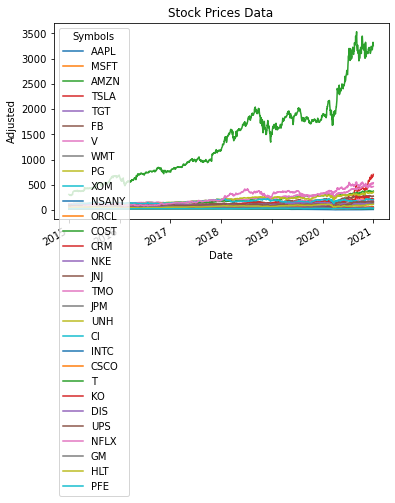

In [12]:
#plotting price trend for all stocks
multpl_stocks['Adj Close'].plot()
plt.xlabel ('Date')
plt.ylabel ('Adjusted')
plt.title ('Stock Prices Data')
plt.savefig('StockPricesData.jpg')
plt.show()

<Figure size 432x288 with 0 Axes>

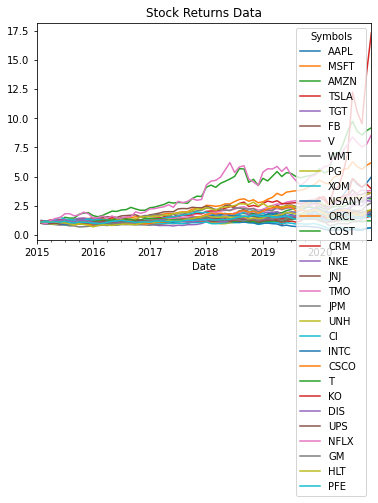

In [13]:
#Calculating amd plotting the returns for the stocks
multpl_stock_daily_returns = multpl_stocks['Adj Close'].pct_change()
multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()
fig = plt.figure()
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.title ('Stock Returns Data')
plt.savefig('StockReturns.jpg')
plt.show()

In [14]:
#Calculating the Mean
print(multpl_stock_monthly_returns.mean())

Symbols
AAPL     0.026334
MSFT     0.027749
AMZN     0.035140
TSLA     0.055075
TGT      0.018190
FB       0.021018
V        0.019559
WMT      0.010839
PG       0.010422
XOM     -0.004048
NSANY   -0.002859
ORCL     0.008828
COST     0.017343
CRM      0.022816
NKE      0.018754
JNJ      0.009766
TMO      0.020612
JPM      0.016683
UNH      0.019914
CI       0.012247
INTC     0.010652
CSCO     0.012441
T        0.004044
KO       0.007759
DIS      0.013588
UPS      0.012812
NFLX     0.036538
GM       0.010744
HLT      0.014268
PFE      0.007960
dtype: float64


In [15]:
# Calculating the standard deviation

#bar chart of the standard deviation for all 30 companies for the monthly returns
print(multpl_stock_monthly_returns.std())

Symbols
AAPL     0.084552
MSFT     0.060164
AMZN     0.084895
TSLA     0.182342
TGT      0.081219
FB       0.077249
V        0.054620
WMT      0.052286
PG       0.041580
XOM      0.073185
NSANY    0.086063
ORCL     0.053169
COST     0.051712
CRM      0.084677
NKE      0.062279
JNJ      0.046217
TMO      0.058618
JPM      0.068868
UNH      0.057442
CI       0.075995
INTC     0.070893
CSCO     0.069163
T        0.052161
KO       0.042773
DIS      0.077076
UPS      0.073492
NFLX     0.112053
GM       0.091453
HLT      0.079443
PFE      0.061033
dtype: float64


In [16]:
#Calculating the correlation
print(multpl_stock_monthly_returns.corr())

Symbols      AAPL      MSFT      AMZN      TSLA       TGT        FB         V  \
Symbols                                                                         
AAPL     1.000000  0.589136  0.455936  0.486643  0.303657  0.514251  0.583701   
MSFT     0.589136  1.000000  0.671252  0.319914  0.174855  0.440422  0.675558   
AMZN     0.455936  0.671252  1.000000  0.291478  0.128286  0.573966  0.622053   
TSLA     0.486643  0.319914  0.291478  1.000000  0.186778  0.321589  0.391266   
TGT      0.303657  0.174855  0.128286  0.186778  1.000000  0.313463  0.344026   
FB       0.514251  0.440422  0.573966  0.321589  0.313463  1.000000  0.578714   
V        0.583701  0.675558  0.622053  0.391266  0.344026  0.578714  1.000000   
WMT      0.218952  0.154659  0.127529  0.153927  0.333641  0.194693  0.213353   
PG       0.354194  0.269411  0.173529  0.224235  0.067267  0.318188  0.256330   
XOM      0.342446  0.425144  0.359695  0.234677  0.369874  0.411071  0.545646   
NSANY    0.467853  0.478746 

In [17]:
#Calculating the covariance
print(multpl_stock_monthly_returns.cov())

Symbols      AAPL      MSFT      AMZN      TSLA       TGT        FB         V  \
Symbols                                                                         
AAPL     0.007149  0.002997  0.003273  0.007503  0.002085  0.003359  0.002696   
MSFT     0.002997  0.003620  0.003429  0.003510  0.000854  0.002047  0.002220   
AMZN     0.003273  0.003429  0.007207  0.004512  0.000885  0.003764  0.002884   
TSLA     0.007503  0.003510  0.004512  0.033249  0.002766  0.004530  0.003897   
TGT      0.002085  0.000854  0.000885  0.002766  0.006596  0.001967  0.001526   
FB       0.003359  0.002047  0.003764  0.004530  0.001967  0.005967  0.002442   
V        0.002696  0.002220  0.002884  0.003897  0.001526  0.002442  0.002983   
WMT      0.000968  0.000487  0.000566  0.001468  0.001417  0.000786  0.000609   
PG       0.001245  0.000674  0.000613  0.001700  0.000227  0.001022  0.000582   
XOM      0.002119  0.001872  0.002235  0.003132  0.002199  0.002324  0.002181   
NSANY    0.003404  0.002479 

Symbols      AAPL      MSFT      AMZN      TSLA       TGT        FB         V  \
Symbols                                                                         
AAPL     1.000000  0.589136  0.455936  0.486643  0.303657  0.514251  0.583701   
MSFT     0.589136  1.000000  0.671252  0.319914  0.174855  0.440422  0.675558   
AMZN     0.455936  0.671252  1.000000  0.291478  0.128286  0.573966  0.622053   
TSLA     0.486643  0.319914  0.291478  1.000000  0.186778  0.321589  0.391266   
TGT      0.303657  0.174855  0.128286  0.186778  1.000000  0.313463  0.344026   
FB       0.514251  0.440422  0.573966  0.321589  0.313463  1.000000  0.578714   
V        0.583701  0.675558  0.622053  0.391266  0.344026  0.578714  1.000000   
WMT      0.218952  0.154659  0.127529  0.153927  0.333641  0.194693  0.213353   
PG       0.354194  0.269411  0.173529  0.224235  0.067267  0.318188  0.256330   
XOM      0.342446  0.425144  0.359695  0.234677  0.369874  0.411071  0.545646   
NSANY    0.467853  0.478746 

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

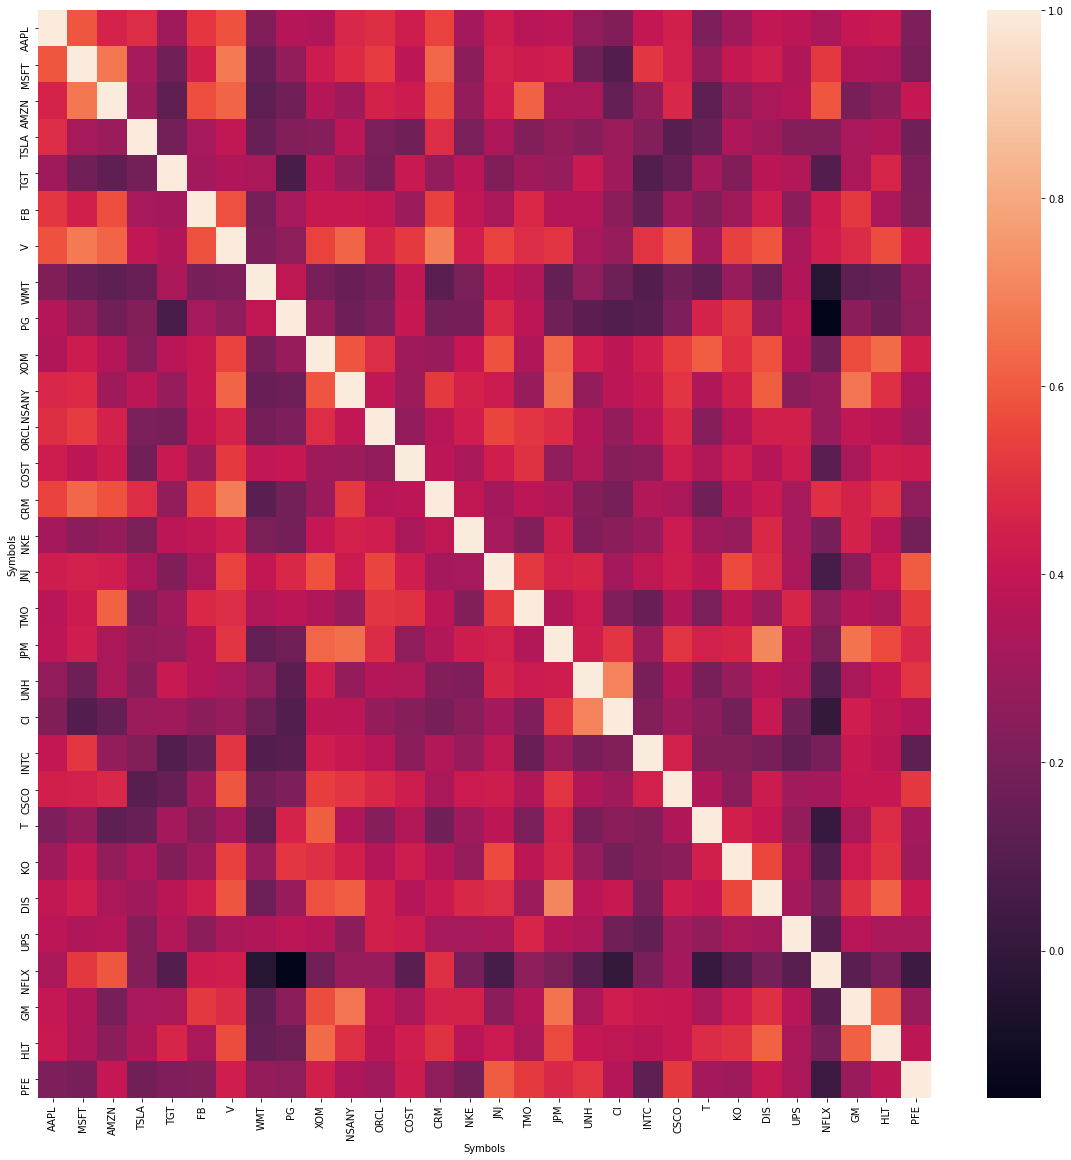

In [18]:
# Heatmap to show correclation of the returns of each stock to the other
plt.subplots(figsize=(20,20))
corr=multpl_stock_monthly_returns.corr()
print(corr)
sns.heatmap(corr)

In [19]:
#bar chart of the standard deviation for all 30 companies for the monthly returns
rawr = multpl_stock_monthly_returns.std()

Text(0.5, 1.0, 'Average Monthly Returns Standard Deviation(2015-2020)')

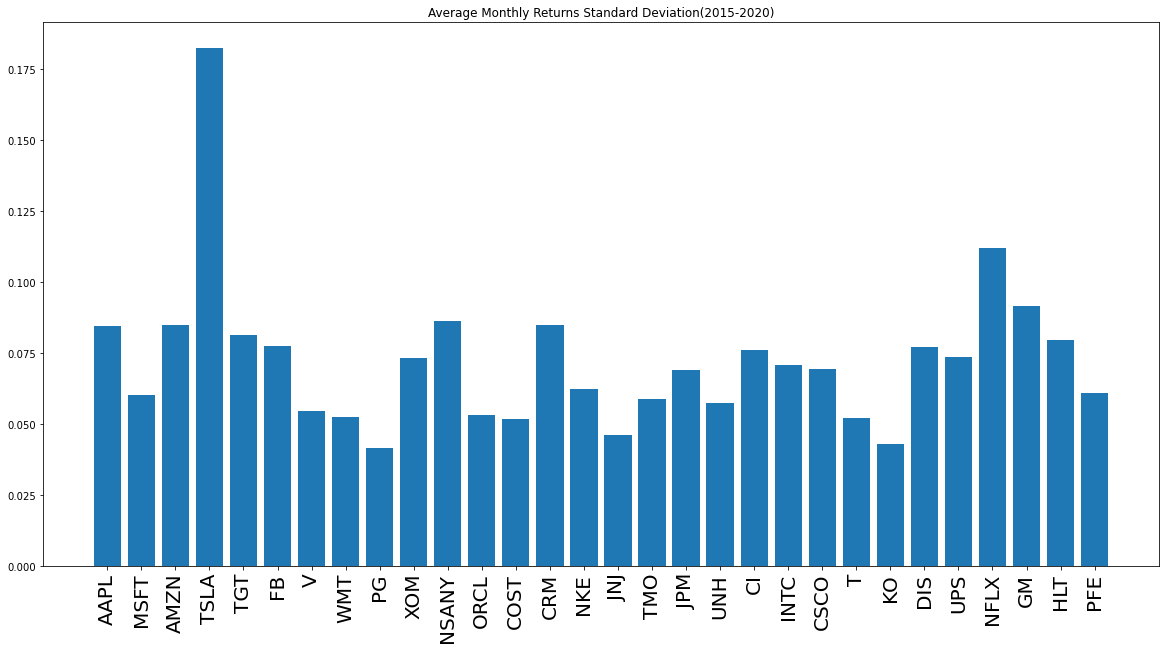

In [20]:
#fig=plt.figure(figsize=(100,50))
#plt.subplot(3,2,1)
plt.figure(figsize=(20,10))

plt.bar(tickers, rawr, align = 'center')
plt.xticks(rotation = 90, fontsize = 20)
plt.title("Average Monthly Returns Standard Deviation(2015-2020)")


#plt.rc('axes', labelsize=5)

#plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')

In [21]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
spark = SparkSession.builder.appName('MachineLearningProject').getOrCreate()

In [22]:
from pyspark.ml.feature import VectorAssembler

In [23]:
daily_variance = multpl_stock_daily_returns.std()
monthly_variance = multpl_stock_monthly_returns.std()

In [24]:
print(daily_variance)

Symbols
AAPL     0.018667
MSFT     0.017527
AMZN     0.019519
TSLA     0.034746
TGT      0.018498
FB       0.020067
V        0.016069
WMT      0.013874
PG       0.012275
XOM      0.017461
NSANY    0.018001
ORCL     0.015924
COST     0.013093
CRM      0.021512
NKE      0.017261
JNJ      0.012187
TMO      0.015398
JPM      0.018479
UNH      0.017604
CI       0.020231
INTC     0.020131
CSCO     0.016862
T        0.013839
KO       0.012068
DIS      0.017035
UPS      0.015691
NFLX     0.026743
GM       0.021583
HLT      0.018853
PFE      0.013858
dtype: float64


In [25]:
daily_var = []
for i in daily_variance:
    daily_var.append(i)

In [26]:
monthly_var = []
for i in monthly_variance:
    monthly_var.append(i)

In [27]:
daily_var

[0.018666511969575958,
 0.01752681206548513,
 0.019519465304290308,
 0.03474631337045932,
 0.018498319720949008,
 0.02006667506476849,
 0.016068831869514525,
 0.01387411547410626,
 0.012275471938075775,
 0.017460978948654213,
 0.01800133958539734,
 0.015924117336982277,
 0.01309273041490616,
 0.021512499264814664,
 0.017260819632940003,
 0.01218728393358948,
 0.015397559095508925,
 0.018479318428127486,
 0.017603649717041325,
 0.02023073220815369,
 0.020131433135957073,
 0.016862421162212482,
 0.013839277231964774,
 0.012068253701840163,
 0.017035432614374794,
 0.01569066794967114,
 0.026743293267112927,
 0.021582839636919815,
 0.018852841807795326,
 0.013857910163822257]

In [28]:
monthly_var

[0.08455165076496676,
 0.06016438996285532,
 0.08489523663458529,
 0.18234216338337902,
 0.08121850945532935,
 0.07724902070174217,
 0.054619815455382296,
 0.05228565296645388,
 0.04158030911236198,
 0.07318516415912661,
 0.08606276270914606,
 0.05316888334443483,
 0.05171175628855109,
 0.08467742123137413,
 0.06227927385173193,
 0.04621704441128958,
 0.05861764371426903,
 0.06886767370004829,
 0.05744173103405647,
 0.0759948302026858,
 0.070892920372715,
 0.06916261959412154,
 0.05216090929148836,
 0.04277298407657611,
 0.07707640261593944,
 0.073491551530175,
 0.11205331269884099,
 0.091453204534412,
 0.07944345851425565,
 0.061033111833106925]

In [29]:
#zip() function ?
#list() function is converting values to a list

combined_var = list(zip(tickers, daily_var, monthly_var))

In [30]:
combined_var

[('AAPL', 0.018666511969575958, 0.08455165076496676),
 ('MSFT', 0.01752681206548513, 0.06016438996285532),
 ('AMZN', 0.019519465304290308, 0.08489523663458529),
 ('TSLA', 0.03474631337045932, 0.18234216338337902),
 ('TGT', 0.018498319720949008, 0.08121850945532935),
 ('FB', 0.02006667506476849, 0.07724902070174217),
 ('V', 0.016068831869514525, 0.054619815455382296),
 ('WMT', 0.01387411547410626, 0.05228565296645388),
 ('PG', 0.012275471938075775, 0.04158030911236198),
 ('XOM', 0.017460978948654213, 0.07318516415912661),
 ('NSANY', 0.01800133958539734, 0.08606276270914606),
 ('ORCL', 0.015924117336982277, 0.05316888334443483),
 ('COST', 0.01309273041490616, 0.05171175628855109),
 ('CRM', 0.021512499264814664, 0.08467742123137413),
 ('NKE', 0.017260819632940003, 0.06227927385173193),
 ('JNJ', 0.01218728393358948, 0.04621704441128958),
 ('TMO', 0.015397559095508925, 0.05861764371426903),
 ('JPM', 0.018479318428127486, 0.06886767370004829),
 ('UNH', 0.017603649717041325, 0.057441731034056

In [31]:
#creating columns for list of rows
columns = ['Tickers', 'Daily_Variance', 'Monthly_Variance']

In [32]:
#creating data frame from list of rows along with columns created
df_test = spark.createDataFrame(data = combined_var).toDF(*columns)

In [33]:
df_test.show()

+-------+--------------------+--------------------+
|Tickers|      Daily_Variance|    Monthly_Variance|
+-------+--------------------+--------------------+
|   AAPL|0.018666511969575958| 0.08455165076496676|
|   MSFT| 0.01752681206548513| 0.06016438996285532|
|   AMZN|0.019519465304290308| 0.08489523663458529|
|   TSLA| 0.03474631337045932| 0.18234216338337902|
|    TGT|0.018498319720949008| 0.08121850945532935|
|     FB| 0.02006667506476849| 0.07724902070174217|
|      V|0.016068831869514525|0.054619815455382296|
|    WMT| 0.01387411547410626| 0.05228565296645388|
|     PG|0.012275471938075775| 0.04158030911236198|
|    XOM|0.017460978948654213| 0.07318516415912661|
|  NSANY| 0.01800133958539734| 0.08606276270914606|
|   ORCL|0.015924117336982277| 0.05316888334443483|
|   COST| 0.01309273041490616| 0.05171175628855109|
|    CRM|0.021512499264814664| 0.08467742123137413|
|    NKE|0.017260819632940003| 0.06227927385173193|
|    JNJ| 0.01218728393358948| 0.04621704441128958|
|    TMO|0.0

In [34]:
#adding output column features to previously created data frame df_test using VectorAssembler() function
#how is the features column calculated? 
assemble=VectorAssembler(inputCols = ['Daily_Variance', 'Monthly_Variance'], outputCol = 'features')

In [35]:
assembled_data = assemble.transform(df_test)

In [36]:
#need to transform original df_test with no features column to include features column before showing
assembled_data.show()

+-------+--------------------+--------------------+--------------------+
|Tickers|      Daily_Variance|    Monthly_Variance|            features|
+-------+--------------------+--------------------+--------------------+
|   AAPL|0.018666511969575958| 0.08455165076496676|[0.01866651196957...|
|   MSFT| 0.01752681206548513| 0.06016438996285532|[0.01752681206548...|
|   AMZN|0.019519465304290308| 0.08489523663458529|[0.01951946530429...|
|   TSLA| 0.03474631337045932| 0.18234216338337902|[0.03474631337045...|
|    TGT|0.018498319720949008| 0.08121850945532935|[0.01849831972094...|
|     FB| 0.02006667506476849| 0.07724902070174217|[0.02006667506476...|
|      V|0.016068831869514525|0.054619815455382296|[0.01606883186951...|
|    WMT| 0.01387411547410626| 0.05228565296645388|[0.01387411547410...|
|     PG|0.012275471938075775| 0.04158030911236198|[0.01227547193807...|
|    XOM|0.017460978948654213| 0.07318516415912661|[0.01746097894865...|
|  NSANY| 0.01800133958539734| 0.08606276270914606|

In [37]:
from pyspark.ml.feature import StandardScaler

In [38]:
#creating a new column to newly features created data frame to now include standardized column
#to create standardized column need features as input column
scale = StandardScaler(inputCol = 'features', outputCol = 'standardized')

In [39]:
#scaling the scale variable previously created and using features data frame assemebled_data as argument
data_scale = scale.fit(assembled_data)

In [40]:
#now transforming features data frame to include standardized column
data_scale_output = data_scale.transform(assembled_data)

In [41]:
data_scale_output.show()

+-------+--------------------+--------------------+--------------------+--------------------+
|Tickers|      Daily_Variance|    Monthly_Variance|            features|        standardized|
+-------+--------------------+--------------------+--------------------+--------------------+
|   AAPL|0.018666511969575958| 0.08455165076496676|[0.01866651196957...|[4.10415826914237...|
|   MSFT| 0.01752681206548513| 0.06016438996285532|[0.01752681206548...|[3.85357536466944...|
|   AMZN|0.019519465304290308| 0.08489523663458529|[0.01951946530429...|[4.29169493842296...|
|   TSLA| 0.03474631337045932| 0.18234216338337902|[0.03474631337045...|[7.63958309801048...|
|    TGT|0.018498319720949008| 0.08121850945532935|[0.01849831972094...|[4.06717826939025...|
|     FB| 0.02006667506476849| 0.07724902070174217|[0.02006667506476...|[4.41200854961515...|
|      V|0.016068831869514525|0.054619815455382296|[0.01606883186951...|[3.53301298604769...|
|    WMT| 0.01387411547410626| 0.05228565296645388|[0.013874

In [42]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [43]:
#creating empty array that going to append later on
silhouette_score = []

In [44]:
#using ClusteringEvaluator() function to be able to use KMeans() function next to be able to cluster ?
evaluator = ClusteringEvaluator(predictionCol = 'prediction', featuresCol = 'standardized', metricName = 'silhouette', distanceMeasure = 'squaredEuclidean')

In [45]:
#iterating from element 2-10 ? 
#Using KMeans() clustering tecnique on the lastest data frame data_scale_output
#data_scale_output is the latest data frame with features and standardized columns
for i in range (2, 10):
    KMeans_algo = KMeans(featuresCol = 'standardized', k = i)
    KMeans_fit = KMeans_algo.fit(data_scale_output)
    output = KMeans_fit.transform(data_scale_output)
    
    #using evaluate() function on previusly created variable evaluator
    #not sure where output and score arguments come from ?
    score = evaluator.evaluate(output)
    silhouette_score.append(score)
    print('Silhouette Score:', score)

Silhouette Score: 0.8955588568574254
Silhouette Score: 0.607460038710211
Silhouette Score: 0.6680347877959668
Silhouette Score: 0.6210656422573406
Silhouette Score: 0.5708751234272869
Silhouette Score: 0.5312810110913484
Silhouette Score: 0.505689617452522
Silhouette Score: 0.6136888982007968


In [46]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'k')

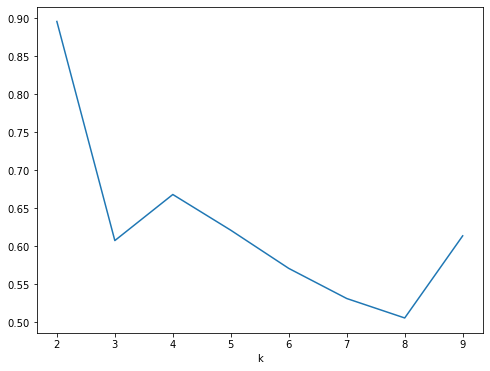

In [47]:
#creating dimensions for subplots
#silhouette_score now has appended score values 
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax.plot(range(2, 10), silhouette_score)
ax.set_xlabel('k')

In [48]:
#need to add prediction column to previusly created dataframe data_scale_output
#iterates 5 times using kmeans algorithm
KMeans_algo = KMeans(featuresCol = 'standardized', k = 5)
KMeans_fit = KMeans_algo.fit(data_scale_output)
output = KMeans_fit.transform(data_scale_output)

In [49]:
output.show()

+-------+--------------------+--------------------+--------------------+--------------------+----------+
|Tickers|      Daily_Variance|    Monthly_Variance|            features|        standardized|prediction|
+-------+--------------------+--------------------+--------------------+--------------------+----------+
|   AAPL|0.018666511969575958| 0.08455165076496676|[0.01866651196957...|[4.10415826914237...|         4|
|   MSFT| 0.01752681206548513| 0.06016438996285532|[0.01752681206548...|[3.85357536466944...|         0|
|   AMZN|0.019519465304290308| 0.08489523663458529|[0.01951946530429...|[4.29169493842296...|         4|
|   TSLA| 0.03474631337045932| 0.18234216338337902|[0.03474631337045...|[7.63958309801048...|         1|
|    TGT|0.018498319720949008| 0.08121850945532935|[0.01849831972094...|[4.06717826939025...|         4|
|     FB| 0.02006667506476849| 0.07724902070174217|[0.02006667506476...|[4.41200854961515...|         4|
|      V|0.016068831869514525|0.054619815455382296|[0.0

In [50]:
#only picking 2 columns from latest data frame output
clustered_tickers = output['Tickers', 'prediction']

In [51]:
#showing only the first 20 rows from clustered stickers sliced data frame
clustered_tickers.show(20, False)

+-------+----------+
|Tickers|prediction|
+-------+----------+
|AAPL   |4         |
|MSFT   |0         |
|AMZN   |4         |
|TSLA   |1         |
|TGT    |4         |
|FB     |4         |
|V      |0         |
|WMT    |3         |
|PG     |3         |
|XOM    |0         |
|NSANY  |4         |
|ORCL   |0         |
|COST   |3         |
|CRM    |4         |
|NKE    |0         |
|JNJ    |3         |
|TMO    |0         |
|JPM    |0         |
|UNH    |0         |
|CI     |4         |
+-------+----------+
only showing top 20 rows



In [52]:
#clusterpredictions shows all the columns for each row value
#features and standardized columns have a DenseVector value along with it for some reason? 
cluster_predictions = output.collect()

In [53]:
cluster_predictions

[Row(Tickers='AAPL', Daily_Variance=0.018666511969575958, Monthly_Variance=0.08455165076496676, features=DenseVector([0.0187, 0.0846]), standardized=DenseVector([4.1042, 3.2106]), prediction=4),
 Row(Tickers='MSFT', Daily_Variance=0.01752681206548513, Monthly_Variance=0.06016438996285532, features=DenseVector([0.0175, 0.0602]), standardized=DenseVector([3.8536, 2.2846]), prediction=0),
 Row(Tickers='AMZN', Daily_Variance=0.019519465304290308, Monthly_Variance=0.08489523663458529, features=DenseVector([0.0195, 0.0849]), standardized=DenseVector([4.2917, 3.2237]), prediction=4),
 Row(Tickers='TSLA', Daily_Variance=0.03474631337045932, Monthly_Variance=0.18234216338337902, features=DenseVector([0.0347, 0.1823]), standardized=DenseVector([7.6396, 6.924]), prediction=1),
 Row(Tickers='TGT', Daily_Variance=0.018498319720949008, Monthly_Variance=0.08121850945532935, features=DenseVector([0.0185, 0.0812]), standardized=DenseVector([4.0672, 3.0841]), prediction=4),
 Row(Tickers='FB', Daily_Vari

In [54]:
#creating empty array named clusters
clusters = []

In [55]:
#iterating through cluster_predictions row by row and appending the prediction column value to clusters empty array
for i in cluster_predictions:
    clusters.append(i['prediction'])

In [56]:
clusters

[4,
 0,
 4,
 1,
 4,
 4,
 0,
 3,
 3,
 0,
 4,
 0,
 3,
 4,
 0,
 3,
 0,
 0,
 0,
 4,
 4,
 0,
 3,
 3,
 0,
 0,
 2,
 4,
 4,
 3]

In [57]:
#converting array of prediction values to a list
cluster_list = list(zip(tickers, clusters))

In [58]:
#if one dimensional list why is it asking for two indexes here? 
cluster_list[0][1]

4

In [59]:
#creating 3 empty arrays for low risk medium risk and high risk
low_risk = []
medium_risk = []
high_risk = []

In [60]:
#appending values from the cluster_list (list of prediction values) into corresponding array based on prediction value
#if prediction value is equal to 0 it goes into low_risk array
#if prediction value is equal to 3 it goes into medium_array
#if prediction value is equal to 4 it goes into high_risk array
for i in range(len(cluster_list)):
    if cluster_list[i][1] == 0:
        low_risk.append(cluster_list[i][0])
    elif cluster_list[i][1] == 3:
        medium_risk.append(cluster_list[i][0])
    elif cluster_list[i][1] == 4:
        high_risk.append(cluster_list[i][0])

In [61]:
#So Prediction value determines which cluster (low,medium,high) risk each company goes into? 
#why is the same company in both low and medium risk array/cluster? 
#this is just to figure out which companies are in each cluster
#need to create new data frame for each cluster
low_risk

['MSFT', 'V', 'XOM', 'ORCL', 'NKE', 'TMO', 'JPM', 'UNH', 'CSCO', 'DIS', 'UPS']

In [62]:
medium_risk

['WMT', 'PG', 'COST', 'JNJ', 'T', 'KO', 'PFE']

In [63]:
high_risk

['AAPL', 'AMZN', 'TGT', 'FB', 'NSANY', 'CRM', 'CI', 'INTC', 'GM', 'HLT']

In [ ]:
#Cluster Analysis

In [ ]:
#so the clusters only include the company names
#I need to find monthly returns of each company in the low risk cluster to be able to put values for the maximize() function
#pm.maximize(.02*a + .016*b + .027*c + .037*d + .007*e, 'profit')
#I need to create data frame that ONLY has low_risk cluster companies
#Once I have that data frame I can look at the adjusted close column for that data frame and run following code
#multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()
#fig = plt.figure()


In [65]:
#New data frame for low_risk companies only called multpl_stocks_lowrisk
#'MSFT', 'V', 'XOM', 'ORCL', 'NKE', 'TMO', 'JPM', 'UNH', 'CSCO', 'DIS', 'UPS'

low_risk_monthly_returns = multpl_stocks_lowrisk['Adj Close'].resample('M').ffill().pct_change()

In [66]:
#Calculating the Mean
#monthly returns of each stock in low_risk cluster
print(low_risk_monthly_returns.mean())

Symbols
MSFT    0.027749
V       0.019559
XOM    -0.004048
ORCL    0.008828
NKE     0.018754
TMO     0.020612
JPM     0.016683
UNH     0.019914
CSCO    0.012441
DIS     0.013588
UPS     0.012812
dtype: float64


In [67]:
print(low_risk_monthly_returns.cov())

Symbols      MSFT         V       XOM      ORCL       NKE       TMO       JPM  \
Symbols                                                                         
MSFT     0.003620  0.002220  0.001872  0.001683  0.000932  0.001494  0.001791   
V        0.002220  0.002983  0.002181  0.001329  0.001478  0.001566  0.001919   
XOM      0.001872  0.002181  0.005356  0.001900  0.001830  0.001484  0.003165   
ORCL     0.001683  0.001329  0.001900  0.002827  0.001440  0.001585  0.001767   
NKE      0.000932  0.001478  0.001830  0.001440  0.003879  0.000837  0.001832   
TMO      0.001494  0.001566  0.001484  0.001585  0.000837  0.003436  0.001424   
JPM      0.001791  0.001919  0.003165  0.001767  0.001832  0.001424  0.004743   
UNH      0.000579  0.001020  0.001824  0.001090  0.000769  0.001407  0.001693   
CSCO     0.001862  0.002236  0.002689  0.001739  0.001803  0.001392  0.002416   
DIS      0.002009  0.002476  0.003257  0.001813  0.002271  0.001325  0.003764   
UPS      0.001527  0.001329 

In [70]:
#Prescriptive
#Need this original sensitivity report to get average mean of returns Obj.Coef
pm.begin('Client Recommendation')

model('Client Recommendation') is the default model.

In [71]:
#'MSFT', 'V', 'XOM', 'ORCL', 'NKE', 'TMO', 'JPM', 'UNH', 'CSCO', 'DIS', 'UPS'
a, b, c, d, e, f, g, h, i, j, k = pm.var('x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11') 


In [72]:
#using monthly average returns of each stock
pm.maximize(.028*a + .019*b - .004*c + .009*d + .019*e + .021*f + .017*g + .019*h + .012*i + .014*j + .013*k, 'profit') 

Max profit: 0.028 * x1 + 0.019 * x2 - 0.004 * x3 + 0.009 * x4 + 0.019 * x5 + 0.021 * x6 + 0.017 * x7 + 0.019 * x8 + 0.012 * x9 + 0.014 * x10 + 0.013 * x11

In [73]:
a + b +c + d + e + f + g + h + i + j + k<= 100000 #investor's limit of $100k

R1: x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 <= 100000

In [75]:
#covariance of amazon to amazon and move decimal points two the left
3.62*a + 2.98*b + 5.36*c + 2.83*d + 3.88*e + 3.44*f + 4.74*g + 3.3*h + 4.78*i + 5.94*j + 5.4*k <= 250

R2: 3.62 * x1 + 2.98 * x2 + 5.36 * x3 + 2.83 * x4 + 3.88 * x5 + 3.44 * x6 + 4.74 * x7 + 3.3 * x8 + 4.78 * x9 + 5.94 * x10 + 5.4 * x11 <= 250

In [76]:
pm.solve()

In [77]:
print('\nMax profit:',pm.vobj())


Max profit: 1.9337016574585637


In [78]:
pm.sensitivity()


PyMathProg 1.0 Sensitivity Report Created: 2021/04/18 Sun 20:11PM
Variable            Activity   Dual.Value     Obj.Coef   Range.From   Range.Till
--------------------------------------------------------------------------------
*x1                  69.0608            0        0.028    0.0230805 1.79769e+308
 x2                        0  -0.00404972        0.019         -inf    0.0230497
 x3                        0   -0.0454586       -0.004         -inf    0.0414586
 x4                        0   -0.0128895        0.009         -inf    0.0218895
 x5                        0    -0.011011        0.019         -inf     0.030011
 x6                        0  -0.00560773        0.021         -inf    0.0266077
 x7                        0    -0.019663        0.017         -inf     0.036663
 x8                        0  -0.00652486        0.019         -inf    0.0255249
 x9                        0   -0.0249724        0.012         -inf    0.0369724
 x10                       0   -0.0319448 

In [79]:
pm.end()

model('Client Recommendation') is not the default model.

In [ ]:
#trying to figure out where these values came from in Fadekes report ??
#5.55*a + 3.87*b + 6.90*c + 25.53*d + 3.78*e <= 250

In [72]:
#Prescriptive
#Need this original sensitivity report
pm.begin('Client Recommendation')
a, b, c, d, e, f, g, h, i, j, k = pm.var('x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11') 
pm.maximize(.028*a + .019*b - .004*c + .009*d + .019*e + .021*f + .017*g + .019*h + .012*i + .014*j + .013*k, 'profit') 
a + b +c + d + e + f + g + h + i + j + k<= 100000 #investor's limit of $100k
3.62*a + 2.98*b + 5.36*c + 2.83*d + 3.88*e + 3.44*f + 4.74*g + 3.3*h + 4.78*i + 5.94*j + 5.4*k <= 250
pm.solve()
print('\nMax profit:',pm.vobj())
pm.sensitivity()
pm.end()


Max profit: 1.9337016574585637

PyMathProg 1.0 Sensitivity Report Created: 2021/04/19 Mon 00:35AM
Variable            Activity   Dual.Value     Obj.Coef   Range.From   Range.Till
--------------------------------------------------------------------------------
*x1                  69.0608            0        0.028    0.0230805 1.79769e+308
 x2                        0  -0.00404972        0.019         -inf    0.0230497
 x3                        0   -0.0454586       -0.004         -inf    0.0414586
 x4                        0   -0.0128895        0.009         -inf    0.0218895
 x5                        0    -0.011011        0.019         -inf     0.030011
 x6                        0  -0.00560773        0.021         -inf    0.0266077
 x7                        0    -0.019663        0.017         -inf     0.036663
 x8                        0  -0.00652486        0.019         -inf    0.0255249
 x9                        0   -0.0249724        0.012         -inf    0.0369724
 x10      

model('Client Recommendation') is not the default model.

In [76]:
#LOW RISK CLIENT (KEPT INVESTOR LIMIT AT $100,00 FOR LOW, MEDIUM, AND HIGH RISK) instead of 100
#instead <= 250 we put <= 500. What does this number mean? 
pm.begin('Client Recommendation')
a, b, c, d, e, f, g, h, i, j, k = pm.var('x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11') 
pm.maximize(.028*a + .019*b - .004*c + .009*d + .019*e + .021*f + .017*g + .019*h + .012*i + .014*j + .013*k, 'profit') 
a + b +c + d + e + f + g + h + i + j + k<= 100000 #investor's limit of $100k
3.62*a + 2.98*b + 5.36*c + 2.83*d + 3.88*e + 3.44*f + 4.74*g + 3.3*h + 4.78*i + 5.94*j + 5.4*k <= 500
pm.solve()
print('\nMax profit:',pm.vobj())
pm.sensitivity()
pm.end()


Max profit: 3.8674033149171274

PyMathProg 1.0 Sensitivity Report Created: 2021/04/19 Mon 00:37AM
Variable            Activity   Dual.Value     Obj.Coef   Range.From   Range.Till
--------------------------------------------------------------------------------
*x1                  138.122            0        0.028    0.0230805 1.79769e+308
 x2                        0  -0.00404972        0.019         -inf    0.0230497
 x3                        0   -0.0454586       -0.004         -inf    0.0414586
 x4                        0   -0.0128895        0.009         -inf    0.0218895
 x5                        0    -0.011011        0.019         -inf     0.030011
 x6                        0  -0.00560773        0.021         -inf    0.0266077
 x7                        0    -0.019663        0.017         -inf     0.036663
 x8                        0  -0.00652486        0.019         -inf    0.0255249
 x9                        0   -0.0249724        0.012         -inf    0.0369724
 x10      

model('Client Recommendation') is not the default model.

In [77]:
#Medium RISK CLIENT
#instead <= 250 we put <= 1500. What does this number mean? 
pm.begin('Client Recommendation')
a, b, c, d, e, f, g, h, i, j, k = pm.var('x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11') 
pm.maximize(.028*a + .019*b - .004*c + .009*d + .019*e + .021*f + .017*g + .019*h + .012*i + .014*j + .013*k, 'profit') 
a + b +c + d + e + f + g + h + i + j + k<= 100000 #investor's limit of $100k
3.62*a + 2.98*b + 5.36*c + 2.83*d + 3.88*e + 3.44*f + 4.74*g + 3.3*h + 4.78*i + 5.94*j + 5.4*k <= 1500
pm.solve()
print('\nMax profit:',pm.vobj())
pm.sensitivity()
pm.end()


Max profit: 11.602209944751381

PyMathProg 1.0 Sensitivity Report Created: 2021/04/19 Mon 00:37AM
Variable            Activity   Dual.Value     Obj.Coef   Range.From   Range.Till
--------------------------------------------------------------------------------
*x1                  414.365            0        0.028    0.0230805 1.79769e+308
 x2                        0  -0.00404972        0.019         -inf    0.0230497
 x3                        0   -0.0454586       -0.004         -inf    0.0414586
 x4                        0   -0.0128895        0.009         -inf    0.0218895
 x5                        0    -0.011011        0.019         -inf     0.030011
 x6                        0  -0.00560773        0.021         -inf    0.0266077
 x7                        0    -0.019663        0.017         -inf     0.036663
 x8                        0  -0.00652486        0.019         -inf    0.0255249
 x9                        0   -0.0249724        0.012         -inf    0.0369724
 x10      

model('Client Recommendation') is not the default model.

In [78]:
#HIGH RISK CLIENT (Does not care about risk)
#instead <= 250 we put <= 2500. What does this number mean? 
pm.begin('Client Recommendation')
a, b, c, d, e, f, g, h, i, j, k = pm.var('x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11') 
pm.maximize(.028*a + .019*b - .004*c + .009*d + .019*e + .021*f + .017*g + .019*h + .012*i + .014*j + .013*k, 'profit') 
a + b +c + d + e + f + g + h + i + j + k<= 100000 #investor's limit of $100k
3.62*a + 2.98*b + 5.36*c + 2.83*d + 3.88*e + 3.44*f + 4.74*g + 3.3*h + 4.78*i + 5.94*j + 5.4*k <= 2500
pm.solve()
print('\nMax profit:',pm.vobj())
pm.sensitivity()
pm.end()


Max profit: 19.337016574585633

PyMathProg 1.0 Sensitivity Report Created: 2021/04/19 Mon 00:37AM
Variable            Activity   Dual.Value     Obj.Coef   Range.From   Range.Till
--------------------------------------------------------------------------------
*x1                  690.608            0        0.028    0.0230805 1.79769e+308
 x2                        0  -0.00404972        0.019         -inf    0.0230497
 x3                        0   -0.0454586       -0.004         -inf    0.0414586
 x4                        0   -0.0128895        0.009         -inf    0.0218895
 x5                        0    -0.011011        0.019         -inf     0.030011
 x6                        0  -0.00560773        0.021         -inf    0.0266077
 x7                        0    -0.019663        0.017         -inf     0.036663
 x8                        0  -0.00652486        0.019         -inf    0.0255249
 x9                        0   -0.0249724        0.012         -inf    0.0369724
 x10      

model('Client Recommendation') is not the default model.